In [7]:
from pathlib import Path
from pprint import pprint
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np

import json

DEFAULT_DUMP_PATH = Path("../dump")
DEFAULT_DUMP_FILE = "setup.json"

In [3]:
setup = "setup01"
setup_file = DEFAULT_DUMP_PATH / setup / DEFAULT_DUMP_FILE
data = json.loads(setup_file.read_text())

moving_tag = data["moving-tag"]
ref_tag = data["reference-tag"]
sensors = list(data["sensors"].keys())
dumps = data["dumps"]

In [8]:
dump_file = DEFAULT_DUMP_PATH / setup / dumps[0]
dump = [line.split("\t") for line in dump_file.read_text().strip().split("\n")]
dump.sort(key=itemgetter(4))

minX = int(dump[0][4])
maxX = int(dump[-1][4])

moving_measures = {}
for sensor in sensors:
    moving_measures[sensor] = {}
    for ch in ["37", "38", "39"]:
        moving_measures[sensor][ch] = [
            [int(l[4]), -int(l[3])]
            for l in dump
            if l[0] == sensor and l[1] == moving_tag and l[2] == ch
        ]

ref_measures = {}
for sensor in sensors:
    ref_measures[sensor] = {}
    for ch in ["37", "38", "39"]:
        ref_measures[sensor][ch] = [
            [int(l[4]), -int(l[3])]
            for l in dump
            if l[0] == sensor and l[1] == ref_tag and l[2] == ch]

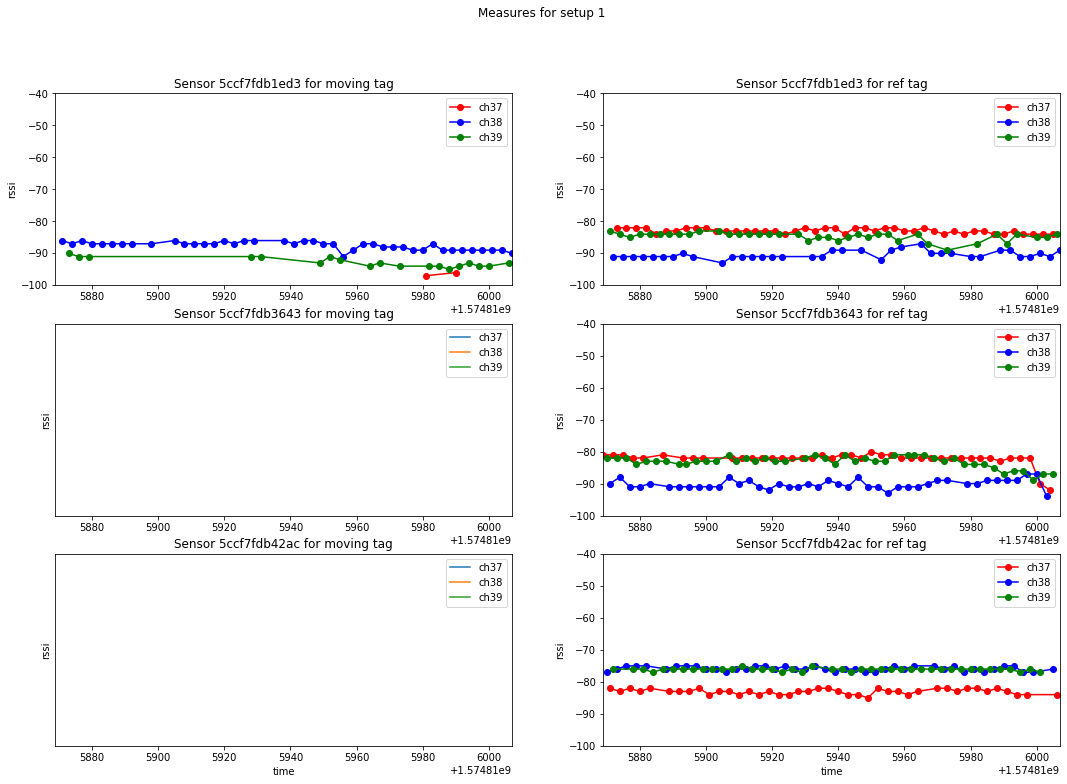

In [13]:
fig = plt.figure(figsize=(18, 12))

subp = 321
for sensor in sensors:
    plt.subplot(subp)
    plt.plot(
        *zip(*moving_measures[sensor]["37"]), "ro-",
    )

    plt.plot(
        *zip(*moving_measures[sensor]["38"]), "bo-",
    )

    plt.plot(
        *zip(*moving_measures[sensor]["39"]), "go-",
    )

    plt.title(f"Sensor {sensor} for moving tag")
    plt.legend(["ch37", "ch38", "ch39"])
    plt.ylabel("rssi")
    plt.axis([minX, maxX, -100, -40])
    subp += 2

plt.xlabel("time")

subp = 322

for sensor in sensors:
    plt.subplot(subp)
    plt.plot(
        *zip(*ref_measures[sensor]["37"]), "ro-",
    )

    plt.plot(
        *zip(*ref_measures[sensor]["38"]), "bo-",
    )

    plt.plot(
        *zip(*ref_measures[sensor]["39"]), "go-",
    )

    plt.title(f"Sensor {sensor} for ref tag")
    plt.legend(["ch37", "ch38", "ch39"])
    plt.ylabel("rssi")
    plt.axis([minX, maxX, -100, -40])
    subp += 2

plt.xlabel("time")
plt.suptitle(f"Measures for setup 1")

plt.show()

['5ccf7fdb1ed3', '5ccf7fdb3643', '5ccf7fdb42ac']